# Johan Suarez 200713010

# Lady Onate 200814451

# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [9]:
from math import pi
def mult_dec_pi(a, b):
    
    decimalspi=[3,1,4,1,5,9,2,6,5,3,5,8,9,7,9,3,2]
    
    
    result = decimalspi[a]*decimalspi[b]
    return result

In [10]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [11]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [12]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [13]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [14]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

10

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

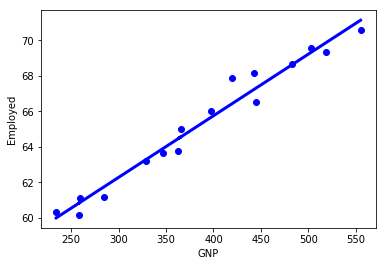

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:,2], data[:,1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")
X=data[:,2]

y=data[:,1]

# import
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X.reshape(-1,1),y.reshape(-1,1))

# Make predictions using the testing set
data_y_pred = regr.predict(X.reshape(-1,1))

plt.plot(X, data_y_pred, color='blue', linewidth=3)


# Exercise 01.3

Analyze the baby names dataset using pandas

In [2]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [3]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [4]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [5]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

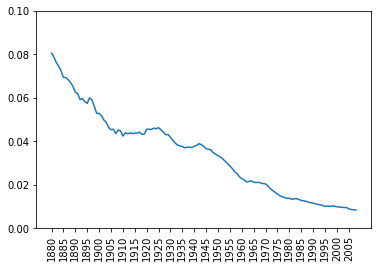

In [6]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

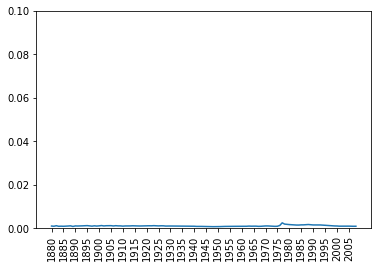

In [25]:
Matthew = boys[boys['name']=='Matthew']

plt.plot(range(Matthew.shape[0]), Matthew['prop'])
plt.xticks(range(Matthew.shape[0])[::5], Matthew['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [34]:
boys['decada']=boys.year/10
boys['decada']=boys.decada.astype(int)
boys['decada']=boys.decada.astype(str)

boys.groupby('decada')

pd.pivot_table(boys, index='name',columns='decada')

prop                                                    \
decada          188       189       190       191       192       193   
name                                                                    
Aaden           NaN       NaN       NaN       NaN       NaN       NaN   
Aarav           NaN       NaN       NaN       NaN       NaN       NaN   
Aaron      0.000775  0.000674  0.000713  0.000677  0.000543  0.000436   
Ab         0.000044       NaN       NaN       NaN       NaN       NaN   
Abb        0.000041  0.000048       NaN       NaN       NaN       NaN   
Abbie      0.000046  0.000046       NaN       NaN       NaN       NaN   
Abbott     0.000044       NaN       NaN       NaN       NaN       NaN   
Abdiel          NaN       NaN       NaN       NaN       NaN       NaN   
Abdul           NaN       NaN       NaN       NaN       NaN       NaN   
Abdullah        NaN       NaN       NaN       NaN       NaN       NaN   
Abe        0.000376  0.000408  0.000392  0.000322  0.000132  0.000064   
Abel       0.000091  0.000096  0.000087  0.000082  0.000077  0.000087   
Abelardo        NaN       NaN       NaN       NaN       NaN       NaN   
Abie       0.000042       NaN       NaN       NaN       NaN       NaN   
Abner      0.000225  0.000168  0.000149  0.000103  0.000061  0.000042   
Abraham    0.000660  0.000687  0.000769  0.000928  0.000451  0.000230   
Abram      0.000194  0.000147  0.000100  0.000081  0.000045  0.000045   
Ace        0.000067  0.000068  0.000067       NaN       NaN       NaN   
Acey       0.000042       NaN       NaN       NaN       NaN       NaN   
Acie       0.000061  0.000064  0.000060  0.000070       NaN       NaN   
Acy             NaN  0.000046       NaN       NaN       NaN       NaN   
Ada        0.000050  0.000062  0.000060       NaN       NaN       NaN   
Adalberto       NaN       NaN       NaN       NaN       NaN       NaN   
Adam       0.000868  0.000701  0.000694  0.000668  0.000392  0.000222   
Adams           NaN  0.000053       NaN       NaN       NaN       NaN   
Adan            NaN       NaN       NaN       NaN  0.000041  0.000043   
Add        0.000037  0.000045       NaN       NaN       NaN       NaN   
Addie      0.000064  0.000068  0.000061       NaN       NaN       NaN   
Addison    0.000144  0.000110  0.000088  0.000072  0.000055  0.000044   
Adelard    0.000051  0.000086       NaN       NaN       NaN       NaN   
...             ...       ...       ...       ...       ...       ...   
Yoshio          NaN       NaN       NaN  0.000056  0.000051       NaN   
Young      0.000093  0.000059  0.000083       NaN       NaN       NaN   
Yurem           NaN       NaN       NaN       NaN       NaN       NaN   
Yusuf           NaN       NaN       NaN       NaN       NaN       NaN   
Zachariah       NaN       NaN       NaN       NaN       NaN       NaN   
Zachary         NaN       NaN       NaN       NaN       NaN       NaN   
Zachery         NaN       NaN       NaN       NaN       NaN       NaN   
Zack       0.000189  0.000149  0.000089  0.000060  0.000050       NaN   
Zackary         NaN       NaN       NaN       NaN       NaN       NaN   
Zackery         NaN       NaN       NaN       NaN       NaN       NaN   
Zaid            NaN       NaN       NaN       NaN       NaN       NaN   
Zaiden          NaN       NaN       NaN       NaN       NaN       NaN   
Zain            NaN       NaN       NaN       NaN       NaN       NaN   
Zaire           NaN       NaN       NaN       NaN       NaN       NaN   
Zakary          NaN       NaN       NaN       NaN       NaN       NaN   
Zander          NaN       NaN       NaN       NaN       NaN       NaN   
Zane            NaN       NaN       NaN       NaN  0.000068  0.000065   
Zavier          NaN       NaN       NaN       NaN       NaN       NaN   
Zayden          NaN       NaN       NaN       NaN       NaN       NaN   
Zayne           NaN       NaN       NaN       NaN       NaN       NaN   
Zeb        0.000088  0.000075  0.000071       NaN       NaN       NaN   


In [21]:
#En la decada de los 1880's el nombre que mas se repite es Fredrick con 10

testboys2=boys.name[boys.decada == 189].copy()
testboys2.describe()

count        10000
unique        1618
top       Fredrick
freq            10
Name: name, dtype: object

# En la decada de los 1880's el nombre que mas se repite es Fredrick con 10

# Exercise 01.4

Which has been the most popular girl name?


In [39]:
testgirl=girls.name[girls.sex == 'girl'].copy()
testgirl.describe()


count     129000
unique      4018
top       Jessie
freq         129
Name: name, dtype: object

# El nombre que mas se repite es Jessie con 129 observaciones

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [51]:
testgirl2=girls.name[girls.year >= 2000].copy()
testgirl2.describe()

count        9000
unique       1314
top       Destiny
freq            9
Name: name, dtype: object

# El nombre que mas se repite es Destiny con 9 observaciones